## read results 

In [644]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [645]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from hockey.visualization.pygame.animate_hockey_game import read_and_merge_dataframes

In [646]:
root_dir = "/tmp/luis-simulation/fetchpuck2"
model_df = read_and_merge_dataframes(root_dir, prefix_fname="model", verbose=True)
agents_df = read_and_merge_dataframes(root_dir, prefix_fname="agents", verbose=True)

From '/tmp/luis-simulation/fetchpuck2' I read ['/tmp/luis-simulation/fetchpuck2/model_1.pd', '/tmp/luis-simulation/fetchpuck2/model_2.pd', '/tmp/luis-simulation/fetchpuck2/model_3.pd', '/tmp/luis-simulation/fetchpuck2/model_4.pd', '/tmp/luis-simulation/fetchpuck2/model_5.pd', '/tmp/luis-simulation/fetchpuck2/model_6.pd', '/tmp/luis-simulation/fetchpuck2/model_7.pd', '/tmp/luis-simulation/fetchpuck2/model_8.pd', '/tmp/luis-simulation/fetchpuck2/model_9.pd']
From '/tmp/luis-simulation/fetchpuck2' I read ['/tmp/luis-simulation/fetchpuck2/agents_1.pd', '/tmp/luis-simulation/fetchpuck2/agents_2.pd', '/tmp/luis-simulation/fetchpuck2/agents_3.pd', '/tmp/luis-simulation/fetchpuck2/agents_4.pd', '/tmp/luis-simulation/fetchpuck2/agents_5.pd', '/tmp/luis-simulation/fetchpuck2/agents_6.pd', '/tmp/luis-simulation/fetchpuck2/agents_7.pd', '/tmp/luis-simulation/fetchpuck2/agents_8.pd', '/tmp/luis-simulation/fetchpuck2/agents_9.pd']


In [647]:
print("Columns on 'model' df: %s" % list(model_df))
print("Columns on 'agents' df: %s" % list(agents_df))

Columns on 'model' df: ['Unnamed: 0', 'goals', 'puck_is_taken', 'shots', 'steps', 'timestamp']
Columns on 'agents' df: ['Step', 'AgentID', 'timestamp', 'pos_x', 'pos_y', 'speed_x', 'speed_y', 'speed_magnitude', 'last_action', 'have_puck']


In [648]:
model_df = model_df.sort_values(by=('timestamp'))
agents_df = agents_df.sort_values(by=('timestamp'))

In [649]:
seconds_between_events = round(model_df.iloc[2]["timestamp"] - model_df.iloc[1]["timestamp"], 5)

In [650]:
max_tick = model_df["Unnamed: 0"].max()

In [651]:
max_timestamp_in_seconds = model_df["timestamp"].max()
max_timestamp_in_minutes = max_timestamp_in_seconds//60
print("Have %.2f seconds of simulation, ~%d minutes" % (max_timestamp_in_seconds, max_timestamp_in_minutes))

Have 76338.80 seconds of simulation, ~1272 minutes


In [652]:
model_df = model_df.sort_values(by=('timestamp'))

## Agents

In [653]:
# agents_df

## Puck movement

### Is it moving at all?

In [654]:
all_puck_movs = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == True]
# all_puck_movs

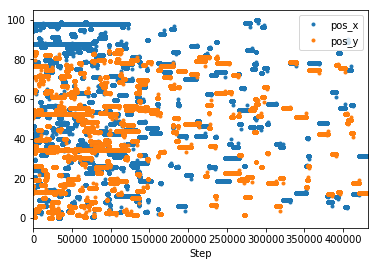

In [655]:
all_puck_movs.plot(x='Step', y=['pos_x', 'pos_y'], style='.')

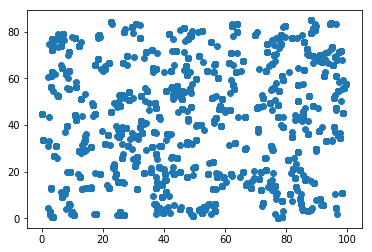

In [656]:
plt.scatter(x=all_puck_movs['pos_x'], y=all_puck_movs['pos_y'])

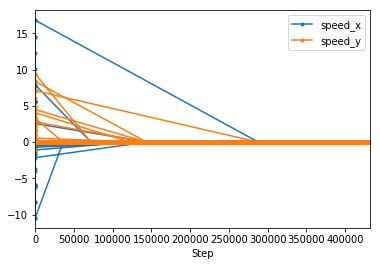

In [657]:
all_puck_movs.plot(x='Step', y=['speed_x', 'speed_y'], style='.-')

### All events done by agents (ie, NOT puck)

In [658]:
all_players_actions = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == False]

In [659]:
# all 'shots' and 'passes' 
# all_players_actions[
#     (all_players_actions['last_action'].str.contains("send puck", na=False) == True) & 
#     (all_players_actions['last_action'].str.contains("[FAILED]", na=False) == False)
# ]

### All failed actions:

In [660]:
# agents_df[agents_df['last_action'].str.contains("FAILED", na=False)]

### All successful GRABs:

In [661]:
all_players_actions[
    all_players_actions['last_action'].str.contains("Grab", na=False) & 
    (all_players_actions['last_action'].str.contains("FAILED", na=False) == False)
]

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,last_action,have_puck
154,77,forward_728f33a8-35be-4d06-8d05-dc78c906da49,3.85,39.074291,14.569444,1.317556e-04,8.949542e-05,1.592764e-04,Grab puck,True
245536,122768,forward_728f33a8-35be-4d06-8d05-dc78c906da49,6138.40,95.936126,36.931254,-4.332826e-01,-6.681995e-01,7.963820e-01,Grab puck,True
395890,3175,forward_ab8f4a35-431b-4f58-b8aa-6632fb7db569,9897.20,96.409740,83.218309,-1.110624e+00,-7.223766e+00,7.308644e+00,Grab puck,True
405716,8088,forward_ab8f4a35-431b-4f58-b8aa-6632fb7db569,10142.85,41.157107,4.787608,-6.531610e-02,3.279382e-02,7.308644e-02,Grab puck,True
422726,16593,forward_ab8f4a35-431b-4f58-b8aa-6632fb7db569,10568.10,7.319115,76.287555,-3.735603e+00,6.324385e+00,7.345241e+00,Grab puck,True
425352,17906,forward_ab8f4a35-431b-4f58-b8aa-6632fb7db569,10633.75,75.690435,19.592353,-5.636489e-01,4.652556e-01,7.308644e-01,Grab puck,True
442320,26390,forward_ab8f4a35-431b-4f58-b8aa-6632fb7db569,11057.95,14.516118,35.965856,-6.380896e+00,-3.563769e+00,7.308644e+00,Grab puck,True
447130,28795,forward_ab8f4a35-431b-4f58-b8aa-6632fb7db569,11178.20,57.034040,12.348011,-1.438413e-02,2.600365e-03,1.461729e-02,Grab puck,True
456640,33550,forward_ab8f4a35-431b-4f58-b8aa-6632fb7db569,11415.95,89.873939,82.556657,-7.128152e-01,-1.614229e-01,7.308644e-01,Grab puck,True
460814,35637,forward_ab8f4a35-431b-4f58-b8aa-6632fb7db569,11520.30,49.586618,21.403796,8.523233e+00,-1.187517e+01,1.461729e+01,Grab puck,True


In [662]:
# all_players_actions[
#             all_players_actions['have_puck'] == True
#        ]

In [669]:
import math
bucket_in_minutes = 15
events_with_puck = []
for curr_minute in range(0, int(math.ceil(max_timestamp_in_minutes)), bucket_in_minutes):
    min_second = curr_minute * 60 # (curr_minute - bucket_in_minutes) * 60
    max_second = min_second + bucket_in_minutes * 60 # curr_minute * (bucket_in_minutes * 60)
    num_events = len(
        all_players_actions[
            all_players_actions.timestamp.between(left=min_second, right=max_second) & \
            all_players_actions['have_puck'] == True
        ]
#             all_players_actions['timestamp'] <= curr_second] & 
#             all_players_actions[all_players_actions['timestamp'] > (curr_second - 1)]
#                      # & all_players_actions[all_players_actions['have_puck'] == True]
                    )
    events_with_puck.append(num_events)
    # print("second: %d, num events: %d" % (curr_second, num_events))
    # len(all_players_actions[all_players_actions['timestamp'] <= curr_second))

1272 minutes, so there are 85 buckets of 15' long each


Text(0.5,1,"Number of 'grab's (per 15 minutes)")

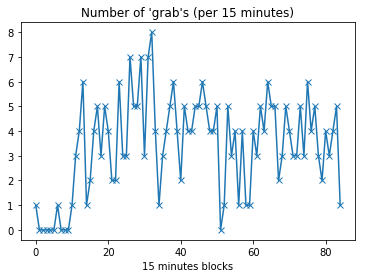

In [670]:
print("%d minutes, so there are %d buckets of %d' long each" % (max_timestamp_in_minutes, max_timestamp_in_minutes//bucket_in_minutes + 1, bucket_in_minutes))
plt.plot(events_with_puck, 'x-')
plt.xlabel("%d minutes blocks" % bucket_in_minutes)
# plt.ylabel("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
plt.title("Number of 'grab's (per %d minutes)" % bucket_in_minutes)

# SCRATCH PAPER DOWN HERE

In [665]:
import numpy as np
import pandas as pd
df=pd.DataFrame({'A':np.random.random(20),'B':np.random.random(20)})


In [666]:
df


,A,B
0,0.515749,0.059969
1,0.792835,0.905955
2,0.326243,0.997316
3,0.219456,0.013124
4,0.714326,0.150667
5,0.808474,0.925749
6,0.230517,0.165060
7,0.473298,0.958609
8,0.467035,0.013743
9,0.085038,0.165451


In [667]:
df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155))).sum()

,A,B
B,,
"(0.0, 0.155]",2.960568,0.364642
"(0.155, 0.31]",1.678630,0.689893
"(0.31, 0.465]",0.616089,0.790977
"(0.465, 0.62]",0.343897,0.490412
"(0.62, 0.775]",0.623455,1.296402
"(0.775, 0.93]",1.727772,2.614881
"(0.93, 1.085]",0.799542,1.955925


[]

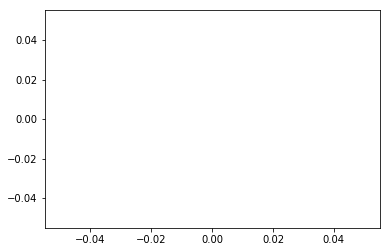

In [668]:
plt.plot()